# Assignment 05: Web Scraping

## Use requests and BeautifulSoup to make a list of all the CORGIS datasets.

In [12]:
import requests

In [13]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [14]:
response

<Response [200]>

In [15]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n\n    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>\n    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"\n            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="\n            crossorigi

In [16]:
print(response.text)

<!DOCTYPE html>
<html lang="en-US">
    <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    
    

    <title>CORGIS Datasets Project</title>
    <meta name="description" content="






            Github Pages for CORGIS Datasets Project">
    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">

    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <link rel="stylesheet" href="/corgis/assets/css/main.css">

    

    

    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>
    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"
            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="
            crossorigin="anonymous"></script>

    <scr

In [17]:
from bs4 import BeautifulSoup

In [18]:
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
document.find_all('h3')

[<h3>Aids</h3>,
 <h3>Airlines</h3>,
 <h3>Billionaires</h3>,
 <h3>Broadway</h3>,
 <h3>Business Dynamics</h3>,
 <h3>Cancer</h3>,
 <h3>Cars</h3>,
 <h3>Classics</h3>,
 <h3>Construction Permits</h3>,
 <h3>Construction Spending</h3>,
 <h3>County Demographics</h3>,
 <h3>Covid</h3>,
 <h3>Drugs</h3>,
 <h3>Earthquakes</h3>,
 <h3>Election</h3>,
 <h3>Electricity</h3>,
 <h3>Emissions</h3>,
 <h3>Energy</h3>,
 <h3>Finance</h3>,
 <h3>Food</h3>,
 <h3>Food Access</h3>,
 <h3>Global Development</h3>,
 <h3>Graduates</h3>,
 <h3>Health</h3>,
 <h3>Hospitals</h3>,
 <h3>Hydropower</h3>,
 <h3>Ingredients</h3>,
 <h3>Injuries</h3>,
 <h3>Labor</h3>,
 <h3>Medal Of Honor</h3>,
 <h3>Music</h3>,
 <h3>Opioids</h3>,
 <h3>Police Shootings</h3>,
 <h3>Publishers</h3>,
 <h3>Real Estate</h3>,
 <h3>Retail Services</h3>,
 <h3>School Scores</h3>,
 <h3>Skyscrapers</h3>,
 <h3>Slavery</h3>,
 <h3>State Crime</h3>,
 <h3>State Demographics</h3>,
 <h3>State Fragility</h3>,
 <h3>Suicide Attacks</h3>,
 <h3>Supreme Court</h3>,
 <h3>Tate</

In [19]:
for i in document.find_all('h3'):
    print(i.text.strip())

Aids
Airlines
Billionaires
Broadway
Business Dynamics
Cancer
Cars
Classics
Construction Permits
Construction Spending
County Demographics
Covid
Drugs
Earthquakes
Election
Electricity
Emissions
Energy
Finance
Food
Food Access
Global Development
Graduates
Health
Hospitals
Hydropower
Ingredients
Injuries
Labor
Medal Of Honor
Music
Opioids
Police Shootings
Publishers
Real Estate
Retail Services
School Scores
Skyscrapers
Slavery
State Crime
State Demographics
State Fragility
Suicide Attacks
Supreme Court
Tate
Video Games
Weather
Wind Turbines


## Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

In [20]:
import pandas as pd

In [21]:
def pdcorgis(a):
    a = a.lower()
    print(a)
    response = requests.get('https://corgis-edu.github.io/corgis/csv/' + a + '/')
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    document.find_all('a')
    for i in document.find_all('a'):
        if i.has_attr('download') == True:
            b = i['href']
            download_link = 'https://corgis-edu.github.io/corgis/csv/' + a + '/' + b
            corgisdf = pd.read_csv(download_link)
            return corgisdf
    else:
        print('not quite')

## Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

In [22]:
df = pdcorgis('Covid')

covid


In [23]:
df.tail()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
53624,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
53628,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779


In [24]:
c = df.groupby('Location.Continent')[['Data.Cases']].sum()

In [25]:
c

,Data.Cases
Location.Continent,
Africa,1828828
America,21239675
Asia,13892019
Europe,11173822
Oceania,43861
Other,696


Text(0, 0.5, 'Region')

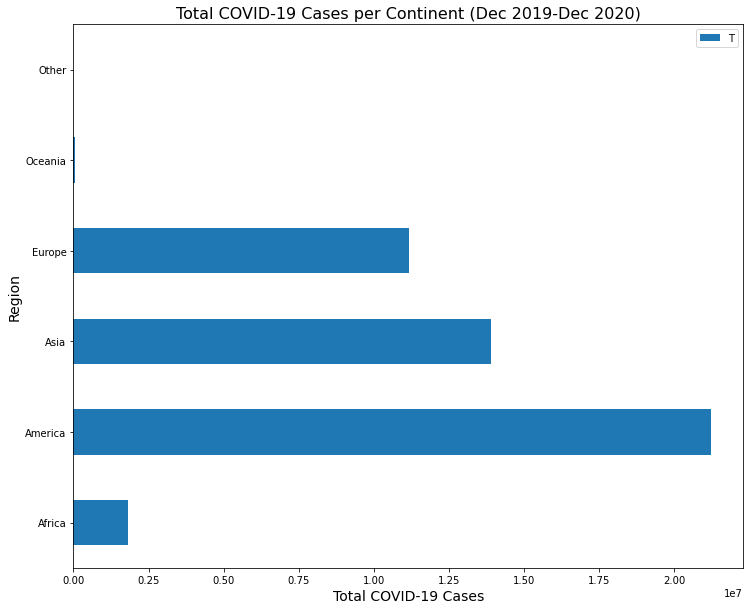

In [26]:
bar = c.plot(kind = 'barh', figsize=(12, 10))
bar.set_title('Total COVID-19 Cases per Continent (Dec 2019-Dec 2020)', fontsize = 16)
bar.legend('Total COVID-19 Cases',fontsize = 10)
bar.set_xlabel('Total COVID-19 Cases',fontsize = 14)
bar.set_ylabel('Region',fontsize = 14)

In [27]:
df_1 = pdcorgis('Publishers')

publishers


In [28]:
df_1.head()

,genre,sold by,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,publisher.name,publisher.type,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews
0,genre fiction,HarperCollins Publishers,6832.0,6832.0,34160.0,20496.0,7000,Katherine Tegen Books,big five,4.57,4.88,1,9604
1,genre fiction,HarperCollins Publishers,2487.5,2487.5,12437.5,7462.5,6250,HarperCollins e-books,big five,4.47,1.99,2,450
2,genre fiction,"Amazon Digital Services, Inc.",9559.0,9559.0,47795.0,28677.0,5500,(Small or Medium Publisher),small/medium,4.16,8.69,3,30
3,fiction,Hachette Book Group,8250.0,8250.0,41250.0,24750.0,5500,"Little, Brown and Company",big five,3.84,7.50,3,3747
4,genre fiction,Penguin Group (USA) LLC,7590.5,7590.5,37952.5,22771.5,4750,Dutton Children's,big five,4.75,7.99,4,9174


In [29]:
m = df_1.head(20)

In [30]:
df_5 = pdcorgis('Tate')

tate


In [31]:
df_5.head()

,artist.gender,artist.name,artist.role,data.medium,data.thumbnail,data.title,data.url,dimensions.depth,dimensions.height,dimensions.width,metadata.acquisition date,metadata.creation decade,metadata.creation year,metadata.credit,artist.birth.location,artist.birth.year,artist.death.location,artist.death.year
0,Female,"Abakanowicz, Magdalena",artist,Burlap and resin,http://www.tate.org.uk/art/images/work/T/T12/T...,Backs,http://www.tate.org.uk/art/artworks/abakanowic...,0.0,0.0,0.0,2009,1970,1976,Presented anonymously 2009,Polska,1930,NaN,0
1,Male,"Abbey, Edwin Austin",artist,Ink on paper,http://www.tate.org.uk/art/images/work/N/N03/N...,Illustration to Judith Shakespeare,http://www.tate.org.uk/art/artworks/abbey-illu...,0.0,419.0,305.0,1924,1880,1883,Presented by a group of admirers through John ...,"Philadelphia, United States",1852,"London, United Kingdom",1911
2,Female,"Abbott, Berenice",artist,"Photograph, gelatin silver print on paper",NaN,Tri-Boro Barber Shop,http://www.tate.org.uk/art/artworks/abbott-tri...,0.0,200.0,250.0,2010,1930,1935,Accepted by HM Government in lieu of inheritan...,"Springfield, United States",1898,"Monson, United States",1991
3,Male,"Abbott, Lemuel Francis",artist,Oil paint on canvas,http://www.tate.org.uk/art/images/work/T/T01/T...,Portrait of the Engraver Francesco Bartolozzi,http://www.tate.org.uk/art/artworks/abbott-por...,0.0,676.0,756.0,1968,0,0,Presented by Mrs M. Bernard 1968,"Leicestershire, United Kingdom",1760,"London, United Kingdom",1803
4,Male,"Abrahams, Ivor",artist,Fibreglass and polystyrene,http://www.tate.org.uk/art/images/work/T/T03/T...,Lady in Niche,http://www.tate.org.uk/art/artworks/abrahams-l...,762.0,1575.0,2095.0,1982,1970,1973,Purchased 1982,"Wigan, United Kingdom",1935,NaN,0


In [32]:
df_6 = df_5.loc[df_5['metadata.acquisition date'] != 0]

<AxesSubplot:>

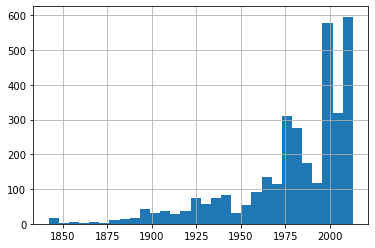

In [33]:
df_6['metadata.acquisition date'].hist(bins = 30)
#Total Artwork Acquisitions per Year at the Tate Museum

In [34]:
df_3 = pdcorgis('Billionaires')

billionaires


In [35]:
df_3

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Non-consumer industrial,not inherited,True,True
2610,Wu Xiong,1565,2014,1999,Biostime International Holdings,owner,infant formula,new,0,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Consumer,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,0.000000e+00,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,0.000000e+00,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True


In [36]:
x = df_3.groupby('year')[['wealth.worth in billions']].sum()

In [37]:
x

,wealth.worth in billions
year,
1996,1049.5
2001,1728.6
2014,6454.4


Text(0, 0.5, 'Year')

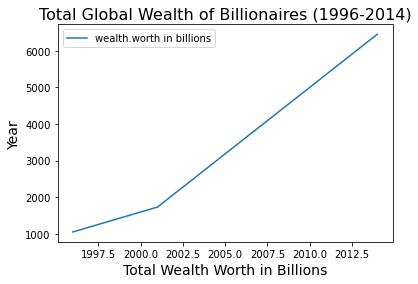

In [38]:
ax = x.plot.line()
ax.set_title('Total Global Wealth of Billionaires (1996-2014)', fontsize = 16)
ax.set_xlabel('Total Wealth Worth in Billions',fontsize = 14)
ax.set_ylabel('Year',fontsize = 14)